<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from PIL import Image

1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

In [2]:
h = lambda theta: theta-np.sin(theta)-np.pi/2
dh = lambda theta: 1-np.cos(theta)
hx = np.linspace(2.3,2.325,100)
hy = h(hx)

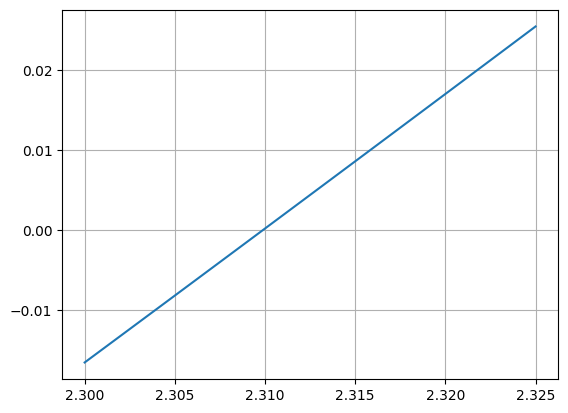

In [3]:
#Verificamos donde puede estar en cero de la función con una grafica
plt.plot(hx,hy)
plt.grid()
plt.show()

In [4]:
#Verificamos donde puede estar en cero de la función con un data frame
m = {"angulo":hx, "funcion":hy}
m_theta = pd.DataFrame(m)
b = m_theta[abs(m_theta["funcion"])<1e-3]
print(b)

      angulo   funcion
37  2.309343 -0.000900
38  2.309596 -0.000478
39  2.309848 -0.000055
40  2.310101  0.000367
41  2.310354  0.000790


In [5]:
#Bisección
raiz_biseccion = optimize.bisect(h,2,3)
print(f"La raiz con el metodo de bisección será: {raiz_biseccion}")

# Punto fijo
fixed_h = lambda theta: theta-h(theta)
raiz_fijo = optimize.fixed_point(fixed_h, 2.3)
print(f"La raiz con el metodo de punto fijo será: {raiz_fijo}")

# Secante
raiz_secante = optimize.newton(h, 2.3)
print(f"La raiz utilizando el metodo de la secante será: {raiz_secante}")

# Newton-Raphson
raiz_newton = optimize.newton(h,2.3,dh)
print(f"La raiz utilizando el metodo de Newton-Raphson será: {raiz_newton}")

La raiz con el metodo de bisección será: 2.309881460010729
La raiz con el metodo de punto fijo será: 2.3098814600100575
La raiz utilizando el metodo de la secante será: 2.3098814600100575
La raiz utilizando el metodo de Newton-Raphson será: 2.309881460010057


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.

In [6]:
t = np.arange(0,10,0.1)
so = 300
m = 0.25
k = 0.1
g = 32.17
s = lambda t: so - (m*g*t/k)+(m**2)*g*t/k*(1-np.e**(-k*t/m))
ds = lambda t: ((-1)*m*g/k)+((m**2)*g/k)*(1-np.e**((-1)*k*t/m)*(1+t*k/m))
y = s(t)

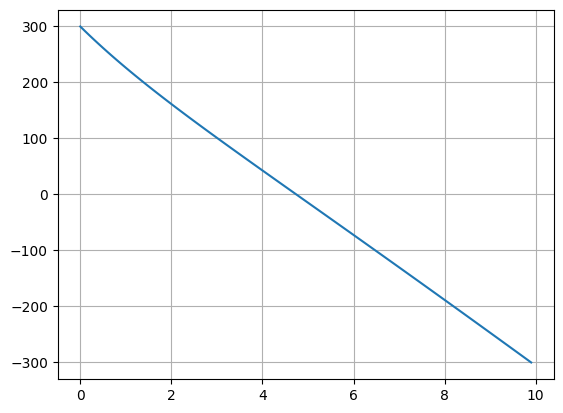

In [7]:
#Verificamos donde puede estar en cero de la función con una grafica
plt.plot(t, s(t))
plt.grid()
plt.show()

In [8]:
#Verificamos donde puede estar en cero de la función con un data frame
a = {"tiempo":t, "altura":y}
caida = pd.DataFrame(a)
print(caida[abs(caida.altura)<5])
print(s(4.75))

    tiempo    altura
47     4.7  2.082205
48     4.8 -3.679038
-0.7985667386642632


In [9]:
raiz_biseccion = optimize.bisect(s,4,6)
print(f"La raiz con el metodo de bisección será: {raiz_biseccion}")

La raiz con el metodo de bisección será: 4.736139137605278


In [10]:
fixed_s = lambda x: x-s(x)

raiz_fijo = optimize.fixed_point(fixed_s, 4.7)
print(f"La raiz con el metodo de punto fijo será: {raiz_fijo}")

La raiz con el metodo de punto fijo será: 4.73613913760349


In [11]:
raiz_secante = optimize.newton(s, 4.7)
print(f"La raiz utilizando el metodo de la secante será: {raiz_secante}")

La raiz utilizando el metodo de la secante será: 4.736139137603489


In [12]:
raiz_newton = optimize.newton(s,4.7,ds,maxiter=1000)
print(f"La raiz utilizando el metodo de Newton-Raphson será: {raiz_newton}")

La raiz utilizando el metodo de Newton-Raphson será: 4.736139137029431


3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [13]:
T = 0.5
f = lambda m: m - np.tanh(m/T)
raiz_secante = optimize.newton(f, 1)
print(f"La raiz utilizando el metodo de la secante será: {raiz_secante:.4f}")

La raiz utilizando el metodo de la secante será: 0.9575


In [14]:
T = 0.5
f = lambda m: m - np.tanh(m/T)
fixed_f = lambda m: m-f(m)
raiz_fijo = optimize.fixed_point(fixed_f, 1)
print(f"La raiz con el metodo de punto fijo será: {raiz_fijo:.4f}")

La raiz con el metodo de punto fijo será: 0.9575


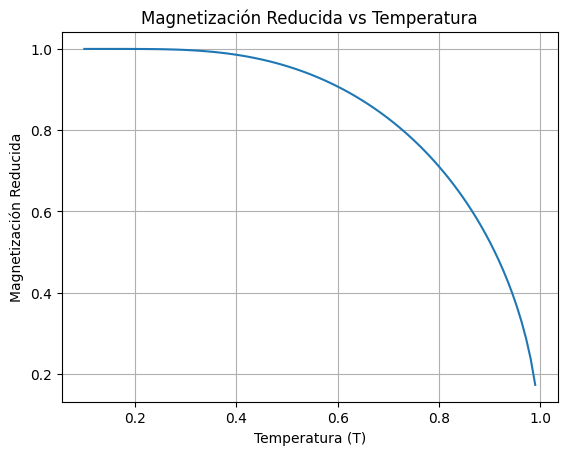

In [15]:
T = np.linspace(0.1,0.99,100)
magnetizacion_reducida = []
def f(m,T):
  return m-np.tanh(m/T)
for temp in T:
  raiz_secante = optimize.newton(f, 1, args=(temp,))
  magnetizacion_reducida.append(raiz_secante)
magnetizacion_reducida = np.array(magnetizacion_reducida)

plt.plot(T, magnetizacion_reducida)
plt.title('Magnetización Reducida vs Temperatura')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización Reducida')
plt.grid(True)
plt.show()

5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

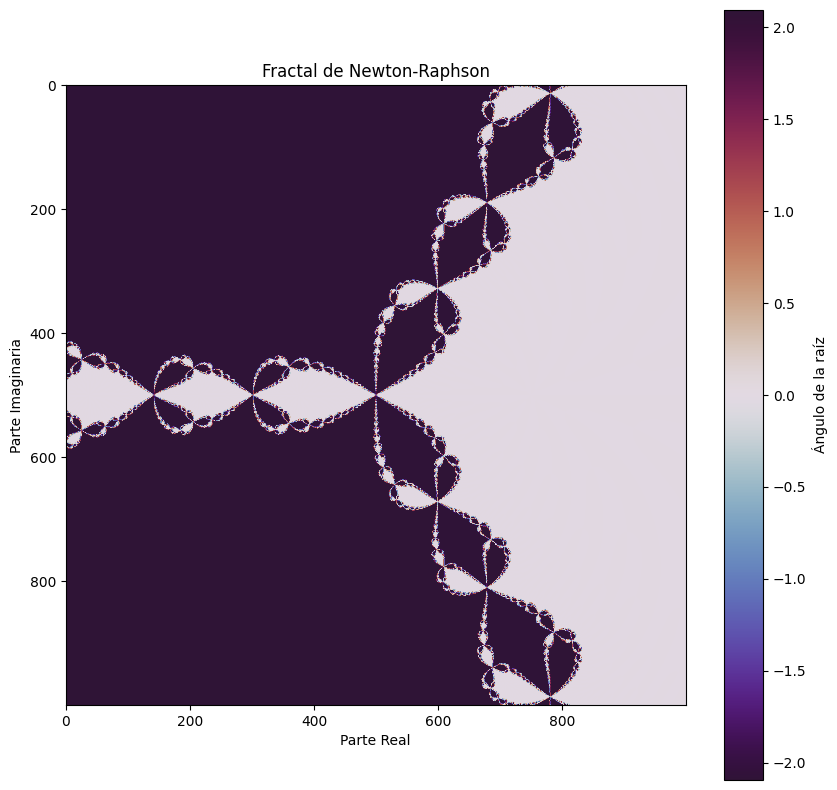

In [16]:
def f(z):
  return z**3 - 1

def f_prime(z, h=1e-5):
  return (f(z + h) - f(z)) / h

def newton_raphson(z, a=1, tolerance=1e-5, max_iterations=100):
    for _ in range(max_iterations):
        if abs(f(z)) < tolerance:
            return z
        z = z - a * (f(z) / f_prime(z))
    return None

x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

fractal = np.zeros_like(Z, dtype=complex)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        fractal[i, j] = newton_raphson(Z[i, j])

plt.figure(figsize=(10, 10))
plt.imshow(np.angle(fractal), cmap='twilight_shifted')
plt.title('Fractal de Newton-Raphson')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.colorbar(label='Ángulo de la raíz')
plt.show()
